# Лабораторная работа №2: Классические методы математической статистики
Выполнил студент гр. 1384 Бобков Владислав. Вариант №3

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа;
сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

*Выборочный аналог математического ожидания - выборочное среднее:*
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$$

*Выборочная дисперсия и СКО:*
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$$

$$S=\sqrt{S^2}$$


*Выборочный коэффициент асимметрии:*
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$$

*Выборочный коэффициент эксцесса:*
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$$

*Метод максимального правдоподобия* - это метод оценивания неизвестного параметра путём максимизации функции правдоподобия
 $$L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$$

*Метод моментов* — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

*Статистика критерия Колмогорова:*
$$D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$$

*Критерий $\chi^2$ для проверки гипотез*

Основан на справнении теоритической плотности распределения и гистограммы, либо теоритической вероятностной меры и полигона частот.

Разобъем множество значений сл. вел. X на $N$ интервалов $I_{1}, ..., I_{N}:$ $I_{i} = (a_{i-1}, a_i], i = \overline {1,N}$. данные интервалы не пересекаются и покрывают всё множество возможных значений сл. вел. X.

Обозначим через $p_{i}$ теоритическую вероятность попадания сл. вел. X в интервал $I_{i}$, при условии, что справедлива $H_{0}$.

$p_{i} = P(X \in I_{i}|H_{0})$

Через $n_{i}$ обозначим число наблюдений нашей выборки, попавших в соответветствующий интервал $I_{i}$.

$n_{i} = \nu(x_{j} \in I_{i})$

Статистика критерия основана на сравнении относительной частоты и теоритической.

$\chi^{2} = \sum \limits_{i=1}^{N} \frac{n}{p_{i}} \bigg ( \frac{n_{i}}{n} - p_{i} \bigg )^{2} = \sum \limits_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} \sim \chi^{2}_{N-1}$

**Теорема Колмогорова:**

$\sqrt{n}D_n \rightarrow K$, при основной гипотезе

**Наиболее мощный критерий:**

$$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > с \\
    p, LR(x) = с \\
    0, LR(x) < с \\
  \end{array}\right.$$




## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.a Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.


In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as sp
import scipy
import warnings
from scipy.stats import poisson, kstwobign,gamma,chi2,expon

warnings.filterwarnings("ignore")
table1 = [1, 5, 1, 5, 3, 0, 3, 0, 0, 0, 0, 5, 1, 5, 0, 2, 1, 7, 1, 6, 2, 2, 2, 2, 0, 1, 1, 2, 3, 1, 6, 0, 1, 2, 0, 1, 1, 2, 0, 4, 3, 1, 4, 0, 4, 1, 4, 1, 4, 0]
table1_sorted = sorted(table1)
print("Вариационный ряд:")
print(table1_sorted)







Вариационный ряд:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7]


In [193]:
def empirical_function(table):
    func = []
    for i in range(len(table)):
        v_i = 0
        for j in range(i):
            if table[j] < table[i]:
                v_i += 1
        func.append(v_i / len(table))
    return func

func1 = empirical_function(table1_sorted)
new_array1 = sorted(list(set(func1)))
new_table1 = sorted(list(set(table1_sorted)))

print("Функция распределения")
for i in range(len(new_array1)):
    print("F(x) = ", new_array1[i], " если", end=" ")
    if i==0:
        print("-inf < x <=", new_table1[i])
    else:
        print(new_table1[i - 1],"< x <=", new_table1[i])
print("F(x) = 1, x > ", new_table1[len(new_table1) - 1])

Функция распределения
F(x) =  0.0  если -inf < x <= 0
F(x) =  0.24  если 0 < x <= 1
F(x) =  0.52  если 1 < x <= 2
F(x) =  0.68  если 2 < x <= 3
F(x) =  0.76  если 3 < x <= 4
F(x) =  0.86  если 4 < x <= 5
F(x) =  0.94  если 5 < x <= 6
F(x) =  0.98  если 6 < x <= 7
F(x) = 1, x >  7


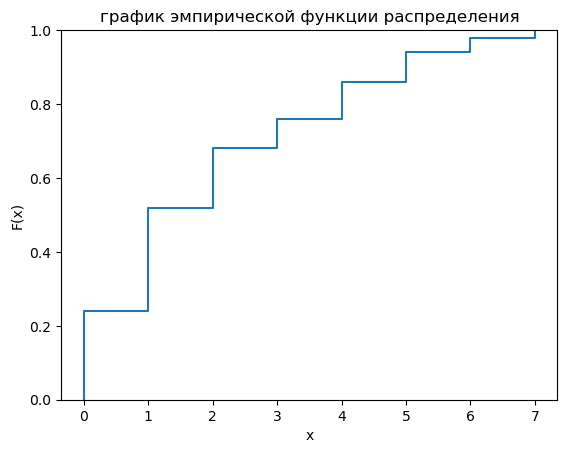

In [194]:
sns.ecdfplot(table1_sorted) #построение эмпирической функции распределения

plt.title("график эмпирической функции распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

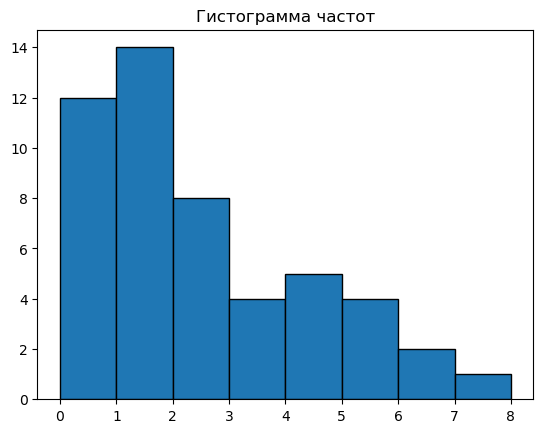

In [195]:
hist, bins,_ = plt.hist(table1_sorted, bins=range(min(table1_sorted), max(table1_sorted) + 2), edgecolor='black')
plt.title('Гистограмма частот')
plt.show()

### 1.b Вычислить выборочные аналоги следующих числовых характеристик:

In [196]:
def find_properties(array,a,b):
    x_a = np.mean(array)
    print("Выборочное математическое ожидание: ", x_a)
    squared_list = [x**2 for x in array]
    s_sq = sum(squared_list) / len(squared_list) - x_a ** 2
    print("Выборочная дисперсия: ", s_sq)
    SKO = np.sqrt(s_sq)
    print("СКО: ",SKO)
    new_data1 = [((x - x_a) ** 3) / (SKO ** 3) for x in array]
    skew = sum(new_data1) / len(new_data1)
    print("Коэффициент ассиметрии: ", skew)
    median = 0
    if len(array) % 2 == 0:
        median = (array[len(array)//2 - 1] + array[len(array)//2]) / 2
    else:
        median = array[len(array)//2]
    print("Выборочная медиана", median)
    new_data2 = [((x - x_a) ** 4 )/ (SKO ** 4) for x in array]
    kurt = sum(new_data2)/len(new_data2) - 3
    print("Коэффициент эксцесса",kurt)
    count = 0
    for i in range(len(array)):
        if array[i] >= a and array[i] <=b: 
            count+=1
    print("Вероятность того, что х принадлежит промежутку [",a,",",b,"]:", count/len(array))
    return x_a, s_sq, SKO, median, skew, kurt

x_a1, s_sq1, SKO1, median1, skew1, kurt1 = find_properties(table1,0,4.45)    

Выборочное математическое ожидание:  2.02
Выборочная дисперсия:  3.5796
СКО:  1.891983086605163
Коэффициент ассиметрии:  0.8394507481295517
Выборочная медиана 0.5
Коэффициент эксцесса -0.3031182736366498
Вероятность того, что х принадлежит промежутку [ 0 , 4.45 ]: 0.86


$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 2.02$

$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=3.5796$

$S=\sqrt{S^2}=1.891983086605163$

$z_{50,\frac{1}{2}} = 1$

$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 0.8394507481295514$

$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = -0.30311827363665067$

$\mathbb{P}\left(x \in \left[a, b\right]\right)$, a = 0.00, b = 4.45:

$\mathbb{P}\left(x \in \left[a, b\right]\right) = 0.86$ 


### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

*Плотность распределения пуассона*:
$q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

*Оценка максимального правдоподобия:*

$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^nq_{\theta}\left(x_i\right)=\prod\limits_{i = 1}^n\frac{\lambda^x_i}{x_i!}e^{-\lambda} =  \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

$LL\left(\vec{X}, \theta \right) = \sum \limits_{i=1}^{n}x_i \cdot \ln{\lambda} - n\lambda + \ln{\prod\limits_{i = 1}^n\frac{1}{\large x_i!}}$

$ \frac{\partial LL\left(\vec{X}, \theta \right)}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} - n = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП

*Оценка методом моментов:*

$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретическая величина)

$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочная величина),
Следовательно, $\widehat{\theta} = \widehat{\lambda} = \overline{X}$

Так как оценки получились одинаковыми, проверку на смещение можно провести 1 раз:

$\mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.

### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\alpha_1 = 0.20$

*Плотность распределения Пуассона*:

$ q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

$\widehat{\theta} = \widehat{\lambda} = \overline{X}$


Так как распределение симметричное:

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.20}{2} = 0.9$, где $\alpha = \alpha_1 = 0.20$

$\mathrm{\Phi}(x_{\alpha}) = 0.90 \Rightarrow x_{\alpha} = 1.65 $ из таблицы значений функции Лапласа

*Асимптотический доверительный интервал:(3 способ)*

$\left[\overline{X} - \sqrt{\frac{S}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{S}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$\left[1.5785147567585074,  2.4614852432414924\right] \ni \lambda$

In [197]:
x_alpha1 = 1.65
alpha1 = 0.2

def find_interval(array,x_a,sko,x_alpha,alpha):
    print("АДИ уровня доверия ",1 - alpha,":")
    print("[",x_a - (x_alpha * sko)/ np.sqrt(len(array)) ,",", x_a + (x_alpha * sko)/ np.sqrt(len(array)),"]")
find_interval(table1,x_a1,SKO1,x_alpha1,alpha1)
    

АДИ уровня доверия  0.8 :
[ 1.5785147567585074 , 2.4614852432414924 ]


### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 4$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.20$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


Значения дл $P_i$ нужно взять согласно гистограмме частот.

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{7, 0.2}^2 = 9.80$

Получили: $\chi^2 = 176.79$

Так как $\chi^2 > \chi_{6, 0.2}^2$, то гипотезу отвергаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу слишком мало, исходя из значений таблицы $\chi^2$

In [198]:
import math
lambda0 = 4
hist = [12, 14,  8,  4,  5,  4,  2,  1] 
bins = [0, 1, 2, 3, 4, 5, 6]
#print(hist,bins)
def get_chi2(lambda0, freq , bins,table,alpha,free):
    n = len(table)
    poisson_dist = poisson(lambda0)
    print("Ожидаемые частоты: ",freq)
    pi = [0] * (len(bins) + 1)
    pi[0] = round(poisson_dist.cdf(bins[0]),4)
    for i in range(1,len(bins)):
        pi[i] = round(poisson_dist.cdf(bins[i]) - poisson_dist.cdf(bins[i - 1]),4)
    pi[len(bins)] = round(1 - poisson_dist.cdf(bins[-1]),4)
    print(pi)
    chi_sq = [0] * len(freq)
    for i in range(len(freq)):
        chi_sq[i] = ((freq[i] - n * pi[i]) ** 2 ) / (n * pi[i])
    chi = sum(chi_sq)
    #вычисление критерия хи квадрат
    print("Значение критерия Хи-квадрат: ",chi)
    print("Критическое значение:", chi2.ppf(1 - alpha, df = free))
    print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - alpha, df = free), free))
    print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(chi, df = free))

get_chi2(lambda0,hist,bins,table1,0.2,7)

Ожидаемые частоты:  [12, 14, 8, 4, 5, 4, 2, 1]
[0.0183, 0.0733, 0.1465, 0.1954, 0.1954, 0.1563, 0.1042, 0.1107]
Значение критерия Хи-квадрат:  176.79039217074813
Критическое значение: 9.803249900240838
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.0


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Для проверки гипотезы нужно минимизировать значение критерия ХИ-квадрат, подбирая значение $\lambda$
   
Получили: $\chi^2 = 16.774$

Из таблицы: $\chi_{k-2, \alpha_1}^2 = \chi_{6, 0.2}^2 = 8.55$

Так как $\chi^2 < \chi_{6, 0.2}^2$ , то гипотезу нельзя принять 

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу равно 0.01, исходя из таблицы значений $\chi^2$.

In [199]:
def chi2_min(lmbd):
    n = len(table1)
    poisson_dist = poisson(lmbd)
    freq = np.array(hist)
    pi = np.zeros(len(bins) + 1)
    pi[0] = round(poisson_dist.cdf(bins[0]),10)
    for i in range(1,len(bins)):
        pi[i] = round(poisson_dist.cdf(bins[i]) - poisson_dist.cdf(bins[i - 1]),10)
    pi[len(bins)] = round(1 - poisson_dist.cdf(bins[-1]),10)
    chi_sq = np.zeros(len(freq))
    chi_sq = ((freq - n * pi) ** 2 ) / (n * pi)
    chi = np.sum(chi_sq)
    return chi

result = scipy.optimize.minimize_scalar(chi2_min)
    #вычисление критерия хи квадрат
print("Значение критерия Хи-квадрат: ",result.fun)
print("Значение лямбда: ", result.x)
print("Критическое значение:", sp.chi2.ppf(1 - 0.2, df = 6))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.2, df = 6), 6))
print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - sp.chi2.cdf(result.fun, df = 6))

Значение критерия Хи-квадрат:  16.774398807662124
Значение лямбда:  2.1242555836502377
Критическое значение: 8.558059720250668
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.010149120000339296


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 4$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 2$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Что получится, если поменять местами основную и альтернативную гипотезы?

$\lambda_0 = 4, \; \lambda_1 = 2, \; \alpha_1 = 0.2$

$ H_0 : X \sim Pois(\lambda_0), \\
H_A : X \sim Pois(\lambda_1)$

Согласно лемме Неймана-Пирсона, наиболее мощный критерий проверки гипотезы $H_0$ при альтернативе $H_A$ имеет вид:

$\phi(\overrightarrow X) = \begin{cases}
  0, LR(\overrightarrow X, \lambda_0, \lambda_1) < C \\
  p, LR(\overrightarrow X, \lambda_0, \lambda_1) = C \\
  1, LR(\overrightarrow X, \lambda_0, \lambda_1) > C
\end{cases} $

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \frac{L\left( \overrightarrow{X},\lambda_{1} \right)}{L\left( \overrightarrow{X},\lambda_{0} \right)}= \frac{\lambda_{1}^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda_{1})}{\lambda_{0}^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda_{0})}$

$LR(\overrightarrow{X}, 2, 4) = 0.5 ^{\sum_{i=1}^{n}X_{i}} \cdot e ^{2n}
= 0.5 ^{n \bar X} \cdot e ^{2n}$

Наиболее мощный критерий:

$\phi(\overrightarrow X) = \begin{cases}
  0, 0.5 ^{n \bar X} \cdot e ^{2n} < C \\
  p, 0.5 ^{n \bar X} \cdot e ^{2n} = C \\
  1, 0.5 ^{n \bar X} \cdot e ^{2n} > C
\end{cases} $

$T = \bar X - МДС $

$ 0.5 ^{n \bar X} \cdot e ^{2n} > C $

$ n \bar X \cdot ln(0.5) + 2n > ln(C) $

$ \bar X <  \cfrac{ln(C) - 2n}{n \cdot ln(0.5)}$

$ Пусть \; C^* = \cfrac{ln(C) - 2n}{n \cdot ln(0.5)}$

Критерий: 

$\phi(\overrightarrow X) = \begin{cases}
  0, \bar X > C^* \\
  p, \bar X = C^* \\
  1, \bar X < C^*
\end{cases} $

Можно найти $C^*$ и p из уравнения:

$P_{\lambda_0}(\bar X > C^*) + p P_{\lambda_0}(\bar X = C^*) = \alpha_1$

$ P_{\lambda_0}(\bar X > C^*) = 1 - P_{n\lambda_0}(n\bar X \le nC^*) = 1 - \sum_{0}^{[nC^{*}]} \cfrac{{(n \lambda_0)} ^i}{i!} e^{-n\lambda_0} < \alpha_1$

$ p = \cfrac{\alpha_1 - 1 + \sum_{0}^{[nC^{*}] - 1} \cfrac{{(n\lambda_0)} ^i}{i!} e^{-n\lambda_0}}{\cfrac{(n\lambda_0) ^{[nC^{*}]}}{[nC^{*}]!} e^{-n\lambda_0}} $



In [200]:
pois = sp.poisson(50 * 4)
a = 0.2
c = 1
while True:
    if 1 - pois.cdf(c) < a:
        break
    c += 1

p = (a - 1 + pois.cdf(c))/(pois.cdf(c) - pois.cdf(c - 1))


print("Значение p: ",p)
print("Значение C*50:",c)
print("Сумма всех элементов выборки: ",sum(table1))

Значение p:  0.6416795208031579
Значение C*50: 212
Сумма всех элементов выборки:  101


$\sum_{i=1}^{n}X_{i} = 101 < C^* \cdot n = 212$, значит гипотеза $H_0$ отвергается, тогда нужно перейти к следующему этаппу задания.

В случае альтернативной гипотезы наиболее мощный критерий будет иметь вид
$\phi(\overrightarrow X) = \begin{cases}
  0, 2 ^{n \bar X} \cdot e ^{-2n} < C \\
  p, 2 ^{n \bar X} \cdot e ^{-2n} = C \\
  1, 2 ^{n \bar X} \cdot e ^{-2n} > C
\end{cases} $

$T = \bar X - МДС $


$ Пусть \; C^* = \cfrac{ln(C) + 2n}{n \cdot ln(2)}$

Критерий: 

$\phi(\overrightarrow X) = \begin{cases}
  0, \bar X < C^* \\
  p, \bar X = C^* \\
  1, \bar X > C^*
\end{cases} $

Найдём $C^*$ и p из уравнения:

$P_{\lambda_1}(\bar X < C^*) + p P_{\lambda_1}(\bar X = C^*) = \alpha_1$

$ P_{\lambda_1}(\bar X \le C^*) = P_{n\lambda_1}(n \bar X \le n C^*) = 
\sum_{0}^{[nC^{*}]} \cfrac{{(n \lambda_1)} ^i}{i!} e^{-n\lambda_1}$

$ \sum_{0}^{[nC^{*}] - 1} \cfrac{{(n\lambda_1)} ^i}{i!} e^{-n\lambda_1} \le \alpha_1 < \sum_{0}^{[nC^{*}]} \cfrac{{(n\lambda_1)} ^i}{i!} e^{-n\lambda_1} $

$ p = \cfrac{\alpha_1 - \sum_{0}^{[nC^{*}] - 1} \cfrac{{(n\lambda_1)} ^i}{i!} e^{-n\lambda_1}}{\cfrac{(n\lambda_1) ^{[nC^{*}]}}{[nC^{*}]!} e^{-n\lambda_1}} $

In [201]:
pois = sp.poisson(50 * 2)
a = 0.2
C = 1
while True:
  if pois.cdf(C - 1) <= a and a < pois.cdf(C):
    break
  C += 1

p = (a - pois.cdf(C - 1))/(pois.cdf(C) - pois.cdf(C - 1))
print("Значение C*n =", C)
print("Значение p=", p)
print("Значение суммы элементов выборки  :", np.sum(table1))

Значение C*n = 92
Значение p= 0.03676469054483969
Значение суммы элементов выборки  : 101


$\sum_{i=1}^{n}X_{i} =101 > C^* \cdot n = 92$, значит гипотеза $H_A$ отвергается

### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений

$\mathbb{P}_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda+1)^{k+1}}, k\in \mathbb{Z_{+}}$

#### c) В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить ОМП и ОММ параметра $\lambda$. Найти смещение оценки.

$\theta = \lambda$

$q_\theta(k)=\frac{\lambda^{k}}{(\lambda+1)^{k+1}}$

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda+1)^{X_{i}}}=\frac{\lambda^{\sum_{i=1}^{n}X_i}}{(\lambda+1)^{\sum_{i=1}^{n}X_i+n}}$

$ LL(\overrightarrow{X};\theta) = ln(\lambda)\sum_{i=1}^{n} X_i - ln(\lambda+1) \sum_{i=1}^{n} X_i - nln(\lambda+1)$

$\cfrac{dLL(\overrightarrow{X};\theta)}{d\lambda} = (\cfrac{1}{\lambda} - \cfrac{1}{\lambda+1}) \sum_{i=1}^{n} X_i - \cfrac{n}{\lambda +1} = 0$

$\widehat \lambda = \bar X = 2.02$

Метод моментов:

$ EX = \sum_{k=0}^{\infty} k \cdot q_\theta(k) = \lambda$  

$ \widehat\lambda = \bar X = 2.02$


Найдём смещение оценки

$E_{\lambda}\overline{X} = \cfrac{1}{n} E_{\lambda} \sum_{i=1}^{n}x_i = \cfrac{n E_{\lambda}X_1 }{n} = \lambda = 2.02 $ - полученная оценка является несмещенной.

#### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\alpha_1 = 0.20$

$\sqrt{n} (\widehat{\theta}(\overrightarrow X) - \theta) \sim \mathcal{N}(0, \frac{1}{I(\widehat \theta)})$

$\sqrt{n \cdot I(\widehat \theta)} \left(\widehat{\theta}(\overrightarrow X) - \theta \right) \sim \mathcal{N}(0, 1)$

Выберем $x_{\alpha} : \Phi(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$

$x_{\alpha} = 1.65$

$ \cfrac{d^2LL}{d\lambda^2} = -\cfrac{\sum_{i=1}^{n} X_i}{\lambda^2} + \cfrac{\sum_{i=1}^{n} X_i}{(\lambda + 1)^2} + \cfrac{n}{(\lambda + 1)^2} $

$I_n(\lambda) = -E \cfrac{d^2LL}{d\lambda^2} = E\cfrac{\sum_{i=1}^{n} X_i}{\lambda^2} - \cfrac{\sum_{i=1}^{n} X_i}{(\lambda + 1)^2} - \cfrac{n}{(\lambda + 1)^2} = \cfrac{n\lambda}{\lambda^2} - \cfrac{n\lambda}{(\lambda+1)^2} - \cfrac{n}{(\lambda + 1)^2}  $

$I(\widehat \theta) = \cfrac{1 }{\bar X} - \cfrac{\bar X}{(\bar X+1)^2} - \cfrac{1}{(\bar X + 1)^2}  = 0.164$

Асимптотический доверительный интервал : $ \left[\widehat{\theta}(\overrightarrow X) - \cfrac{x_{\alpha}}{\sqrt{n \cdot I(\widehat \theta)}}; \widehat{\theta}(\overrightarrow X) + \cfrac{x_{\alpha}}{\sqrt{n \cdot I(\widehat \theta)}} \right] $

Таким образом, $[1.444; 2.596 ]\ni \lambda$



#### e) Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с распределением из семейства геометрических  с параметром $\lambda_{0}$. Проверить гипотезу на уровень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [202]:
hist0 = [12, 14,  8,  4,  5,  4,  2,  1] 
bins0 = [0, 1, 2, 3, 4, 5, 6]
print(hist0,bins0)

def geom_dist(x):
    return sum(lambda0 ** i / (lambda0 + 1) ** (i + 1) for i in range(x+1))

def get_chi2_geom(lambda0, freq , bins,table,alpha,free):
    n = len(table)
    print("Ожидаемые частоты: ",freq)
    pi = [0] * (len(bins) + 1)
    pi[0] = round(geom_dist(bins[0]),4)
    for i in range(1,len(bins)):
        pi[i] = round(geom_dist(bins[i]) - geom_dist(bins[i - 1]),4)
    pi[len(bins)] = round(1 - geom_dist(bins[-1]),4)
    print(pi)
    chi_sq = [0] * len(freq)
    for i in range(len(freq)):
        chi_sq[i] = ((freq[i] - n * pi[i]) ** 2 ) / (n * pi[i])
    chi = sum(chi_sq)
    #вычисление критерия хи квадрат
    print()
    print("Значение критерия Хи-квадрат: ",chi)
    print("Критическое значение:", chi2.ppf(1 - alpha, df = free))
    print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - alpha, df = free), free))
    print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(chi, df = free))

get_chi2_geom(lambda0,hist0,bins0,table1,0.2,7)

[12, 14, 8, 4, 5, 4, 2, 1] [0, 1, 2, 3, 4, 5, 6]
Ожидаемые частоты:  [12, 14, 8, 4, 5, 4, 2, 1]
[0.2, 0.16, 0.128, 0.1024, 0.0819, 0.0655, 0.0524, 0.2097]

Значение критерия Хи-квадрат:  14.632594189765502
Критическое значение: 9.803249900240838
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.04100823330731085


$\mathcal{X}^2 > x_\alpha \Rightarrow$ отвергается $H_0$ 

Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу, слишком мало.

#### f) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением из семейства геометрических. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [203]:
def geom_dist(x,lmbd):
    return sum(lmbd ** i / (lmbd + 1) ** (i + 1) for i in range(x+1))
def chi2_geom(lmbd):
    n = len(table1)
    freq = np.array(hist0)
    #print("Ожидаемые частоты: ",freq)
    pi = np.zeros(len(bins0) + 1)
    pi[0] = round(geom_dist(bins0[0],lmbd),4)
    for i in range(1,len(bins0)):
        pi[i] = round(geom_dist(bins0[i],lmbd) - geom_dist(bins0[i - 1],lmbd),4)
    pi[len(bins0)] = round(1 - geom_dist(bins0[-1],lmbd),4)
    #print(pi)
    chi_sq = [0] * len(freq)
    for i in range(len(freq)):
        chi_sq[i] = ((freq[i] - n * pi[i]) ** 2 ) / (n * pi[i])
    chi = sum(chi_sq)
    return chi

result = scipy.optimize.minimize_scalar(chi2_geom)
    #вычисление критерия хи квадрат
print("Значение критерия Хи-квадрат: ",result.fun)
print("Значение лямбда: ", result.x)
print("Критическое значение:", chi2.ppf(1 - 0.2, df = 6))
print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - 0.2, df = 6), 6))
print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(result.fun, df = 6))


Значение критерия Хи-квадрат:  5.805237705581781
Значение лямбда:  2.2431354338789027
Критическое значение: 8.558059720250668
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.44535751400452195


Получили значение критерия  $\mathcal{X}^2 $ = 5.805 при критическом значении 8.55. Следовательно, гипотезу можно принять.

Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу, равно 0.445

### 2.а Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот.


In [204]:
table2 = [8.45, 0.92, 0.30, 2.16, 1.02, 6.24, 2.79, 6.82, 1.57, 15.94, 0.96, 1.74, 0.00, 0.35, 0.16, 0.50, 0.04, 1.17, 4.81, 3.24, 10.76, 0.01, 0.40, 2.90, 0.76,0.49, 1.99, 4.52, 0.14, 0.00, 0.23, 2.27, 2.40, 0.17, 0.25, 0.06, 0.08, 4.40, 2.70, 0.80, 2.21, 1.55, 0.00, 0.14, 0.36, 0.00, 10.54, 6.17, 0.01, 1.01]
table2_sorted = sorted(table2)
print("Вариационный ряд:")
print(table2_sorted)


Вариационный ряд:
[0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.04, 0.06, 0.08, 0.14, 0.14, 0.16, 0.17, 0.23, 0.25, 0.3, 0.35, 0.36, 0.4, 0.49, 0.5, 0.76, 0.8, 0.92, 0.96, 1.01, 1.02, 1.17, 1.55, 1.57, 1.74, 1.99, 2.16, 2.21, 2.27, 2.4, 2.7, 2.79, 2.9, 3.24, 4.4, 4.52, 4.81, 6.17, 6.24, 6.82, 8.45, 10.54, 10.76, 15.94]


In [205]:

func2 = empirical_function(table2_sorted)
new_array2 = sorted(list(set(func2)))
new_table2 = sorted(list(set(table2_sorted)))

print("Функция распределения")
for i in range(len(new_array2)):
    print("F(x) = ", new_array2[i], " если", end=" ")
    if i==0:
        print("-inf < x <=", new_table2[i])
    else:
        print(new_table2[i - 1],"< x <=", new_table2[i])
print("F(x) = 1, x > ", new_table2[len(new_table2) - 1])

Функция распределения
F(x) =  0.0  если -inf < x <= 0.0
F(x) =  0.08  если 0.0 < x <= 0.01
F(x) =  0.12  если 0.01 < x <= 0.04
F(x) =  0.14  если 0.04 < x <= 0.06
F(x) =  0.16  если 0.06 < x <= 0.08
F(x) =  0.18  если 0.08 < x <= 0.14
F(x) =  0.22  если 0.14 < x <= 0.16
F(x) =  0.24  если 0.16 < x <= 0.17
F(x) =  0.26  если 0.17 < x <= 0.23
F(x) =  0.28  если 0.23 < x <= 0.25
F(x) =  0.3  если 0.25 < x <= 0.3
F(x) =  0.32  если 0.3 < x <= 0.35
F(x) =  0.34  если 0.35 < x <= 0.36
F(x) =  0.36  если 0.36 < x <= 0.4
F(x) =  0.38  если 0.4 < x <= 0.49
F(x) =  0.4  если 0.49 < x <= 0.5
F(x) =  0.42  если 0.5 < x <= 0.76
F(x) =  0.44  если 0.76 < x <= 0.8
F(x) =  0.46  если 0.8 < x <= 0.92
F(x) =  0.48  если 0.92 < x <= 0.96
F(x) =  0.5  если 0.96 < x <= 1.01
F(x) =  0.52  если 1.01 < x <= 1.02
F(x) =  0.54  если 1.02 < x <= 1.17
F(x) =  0.56  если 1.17 < x <= 1.55
F(x) =  0.58  если 1.55 < x <= 1.57
F(x) =  0.6  если 1.57 < x <= 1.74
F(x) =  0.62  если 1.74 < x <= 1.99
F(x) =  0.64  если 1.

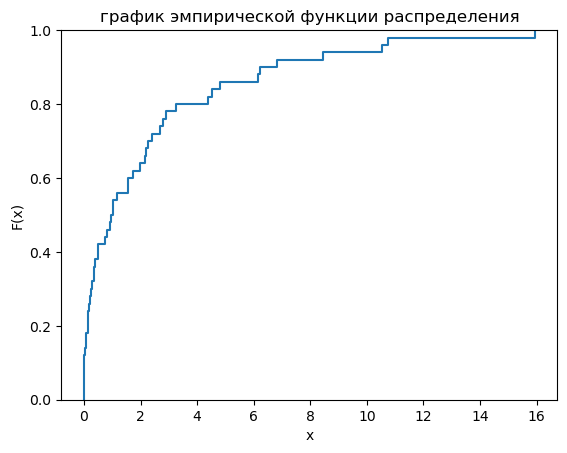

In [206]:
sns.ecdfplot(table2_sorted) #построение эмпирической функции распределения

plt.title("график эмпирической функции распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

15.94
[ 0.   1.4  2.8  4.2  5.6  7.   8.4  9.8 11.2 12.6 14.  15.4 16.8]
[23 10  2  3  3  0  1  2  0  0  0  1] [ 0.   1.4  2.8  4.2  5.6  7.   8.4  9.8 11.2 12.6 14.  15.4 16.8]


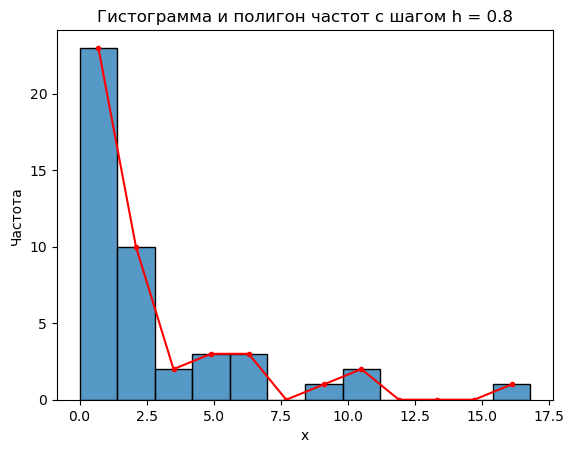

In [207]:
sns.histplot(x=new_table2,binwidth=1.4)
print(max(new_table2))
bins = np.arange(min(new_table2), max(new_table2) + 1.4, 1.4)
print(bins)
hist, _ = np.histogram(new_table2, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist,'-r', marker='.')

plt.title("Гистограмма и полигон частот с шагом h = 0.8")
plt.xlabel("x")
plt.ylabel("Частота");
print(hist,_)

### 2.b Вычислить выборочные аналоги следующих числовых характеристик:


In [208]:
x_a2, s_sq2, SKO2, median2, skew2, kurt2 = find_properties(table2_sorted,0,3.91)
    

Выборочное математическое ожидание:  2.33
Выборочная дисперсия:  10.825663999999994
СКО:  3.2902376813841268
Коэффициент ассиметрии:  2.196397387520135
Выборочная медиана 0.985
Коэффициент эксцесса 4.97648062578535
Вероятность того, что х принадлежит промежутку [ 0 , 3.91 ]: 0.8


$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 2.33$

$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=10.825663999999994$

$S=\sqrt{S^2}=3.2902376813841268$

$z_{n,\frac{1}{2}} = 0.985$

$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 2.196397387520135$

$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 4.97648062578535$

$\mathbb{P}\left(x \in \left[c, d\right]\right)$, a = 0.00, b = 3.91:

$\mathbb{P}\left(x \in \left[c, d\right]\right) = 0.8$ 

### 2.c В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметра $\lambda$ и соответствующую ему оценку по методу моментов. Найти смещения оценок

*Плотность показательного распределения*:
$q_{\theta} = \lambda \cdot e^{-\lambda \cdot x}$, x > 0

*Оценка максимального правдоподобия:*

$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^n q_{\theta}\left( x_i\right)=\prod\limits_{i = 1}^n \lambda \cdot e^{-\lambda \cdot x_i}  =  \lambda^{n} \cdot e^{-\lambda \cdot \sum \limits_{i=1}^{n}x_i} $

$LL\left(\vec{X}, \theta \right) = n \cdot \ln{\lambda} - \lambda \cdot \sum \limits_{i=1}^{n}x_i $

$ \frac{\partial LL}{\partial \lambda} = \frac{n}{\lambda} - \sum \limits_{i=1}^{n}x_i = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$ - ОМП

$ \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta} n\cdot \sum \limits_{i=1}^{n}\frac{1}{x_i} =  n \cdot\frac{1}{n-1}   \cdot \lambda = \frac{n\cdot\lambda}{n+1} \Rightarrow$ смещённая оценка.

МДС:

$T=\sum_{i=1}^{n}X_{i}$.

т.к. $q_{\theta}$ принадлежит семейству экспоненциальных распределений $\Rightarrow$ МДС =  ПДС.
$\mathbb{E}\widetilde{\theta} = \mathbb{E} \widehat{\theta} \cdot \frac{n-1}{n} = \frac{n\cdot\lambda}{n+1}\cdot \frac{n-1}{n} = \lambda$

$ \widetilde{\theta} = \widehat{\theta} \cdot \frac{n-1}{n} - несмещенная \, оценка$

*Оценка методом моментов:*

$\mathbb{E}X = \frac{1}{\lambda}$ - теоретическое математическое ожидание

$\mathrm{M} = \overline{X}$ - выборочное среднее 

Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \frac{1}{\overline{X}}$ — несмещенная оценка

### 2.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$\alpha_2 = 0.20$

*Плотность распределения Пуассона*:

$q_{\theta} = \lambda \cdot e^{-\lambda \cdot x}$, x > 0

$\widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$


Так как распределение симметричное:

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.20}{2} = 0.9$, где $\alpha = \alpha_2 = 0.20$

$\mathrm{\Phi}(x_{\alpha}) = 0.90 \Rightarrow x_{\alpha} = 1.65 $ из таблицы значений функции Лапласа

*Асимптотический доверительный интервал:(3 способ)*

$\left[\overline{X} - \sqrt{\frac{S}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{S}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_2$ для параметра $\lambda$:
$\left[1.5622387058466678 ,  3.097761294153332 \right] \ni \lambda$

In [209]:
x_alpha2 = 1.65
alpha2 = 0.2
find_interval(table2,x_a2,SKO2,x_alpha2,alpha2)


АДИ уровня доверия  0.8 :
[ 1.5622387058466678 , 3.097761294153332 ]


### 2.e C использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $λ_{0}=0.33$. Проверить гипотезу на уровне значимости $\alpha_2 = 0,2$. Вычислить наибольшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.

Пусть данная выборка $X_1, X_2, \dots, X_n$ - выборка из распределения с функцией распределения F.

Основная гипотеза: $H_0 : F \equiv Exp(\lambda_0)$

Альтернативная гипотеза: $H_A : \exists x : F(x) \neq F_{Exp(\lambda_0)}(x)$

Составим критерий уровня значимости $\alpha_2$:

$\phi(x) = 0$, при $D_n \le x_{\alpha_2}$

$\phi(x) = 1$, при $D_n > x_{\alpha_2}$

где $x_{\alpha_2} : K(x_{\alpha_2} / \sqrt{n}) = 1 - \alpha_2$

Статистика критерия Колмагорова: $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

Теорема Колмагорова: $\sqrt{n}D_n \rightarrow K, при \, основной \, гипотезе$

$D_n = 0.32 $

Критическое значение: C =  0.151

Т.к. $D_n > c $ , то гипотезу отвергаем.
Как можно увидеть, наибольшее значение уровня значимости будет очень маленьким: 7.09192255673452e-05

In [210]:
values, edges = np.histogram(table2, bins=len(table2))
Y = values.cumsum() / len(table2)

lambda0 = 0.33

def F_n(x, Y, edges):
  for i in range(len(Y)):
    if (x > edges[i] and x <= edges[i+1]):
      return Y[i]
    elif (x > edges[-1]):
      return 1
    elif (x <= edges[0]):
      return 0

def F_0(x):
  return 1 - np.exp(-x*lambda0)

D = 0
x = 0
while (x <= 5):
  if (D < np.abs(F_n(x, Y, edges) - F_0(x))):
    D = np.abs(F_n(x, Y, edges) - F_0(x))
  x += 0.0001

print("Статистика критерия Колмогорова Dn:", D)
print("x_alpha_2:", kstwobign.ppf(1 - alpha2) / np.sqrt(len(table2)))
print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - kstwobign.cdf(D*np.sqrt(len(table2))))

Статистика критерия Колмогорова Dn: 0.32011117095758485
x_alpha_2: 0.1517096432224198
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 7.09192255673452e-05


### 2.f Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_0 = 0.33$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$

Также разобью все множество на интервалы, число элементов выборки в каждом из них больше или равно 5.

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.2}^2 = 4.64$

Получили: $\chi^2 = 180.66$

Так как $\chi^2 <> \chi_{12, 0.2}^2$ , то гипотезу отвергаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, слишком мало, исходя из таблицы значений $\chi^2$.

In [211]:
hist = list(hist)
hist1 = [23,10,5,7]
bins1 = [1.4,2.8,5.6]
def get_chi2_2(lambda0, table,freq,new_table,alpha,free,bins):
    n = len(table)
    expon_dist = expon(lambda0)
    print(bins)
    print("Ожидаемые частоты: ",freq)
    pi = np.zeros(len(bins) + 1)
    freq = np.array(freq)
    pi[0] = expon_dist.cdf(bins[0])
    for i in range(1,len(bins)):
        pi[i] = expon_dist.cdf(bins[i]) - expon_dist.cdf(bins[i - 1])
    pi[len(bins)] = 1.0 - expon_dist.cdf(bins[-1])
    print(pi)
    chi_square = ((freq - n * pi) ** 2) / (n * pi)
    print()
    print("Значение критерия Хи-квадрат: ",np.sum(chi_square))
    print("Критическое значение:", chi2.ppf(1 - alpha, df = free))
    print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - alpha, df = free), free))
    print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(np.sum(chi_square), df = free))


get_chi2_2(0.33,table2,hist1,new_table2,0.2,3,bins1)

[1.4, 2.8, 5.6]
Ожидаемые частоты:  [23, 10, 5, 7]
[0.65699148 0.25842366 0.07944125 0.00514361]

Значение критерия Хи-квадрат:  180.66454172195446
Критическое значение: 4.64162767608745
p-value =  0.20000000000000007
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.0


### 2.g Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Рассмотрим:

$\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$

Нужно минимизировать значение критерия, чтоб проверить гипотезу.

Из таблицы: $\chi_{k-1-1, \alpha_1}^2 = \chi_{2, 0.2}^2 = 3.22$

Получty: $\chi^2 =  95.2$

Так как $\chi^2 > \chi_{2, 0.2}^2$ , то гипотезу отвергаем

In [212]:
def get_chi2_2_min(lmbd):
    n = len(table2)
    expon_dist = expon(lmbd)
    pi = np.zeros(len(bins1) + 1)
    freq = np.array(hist1)
    pi[0] = expon_dist.cdf(bins1[0])
    for i in range(1,len(bins1)):
        pi[i] = expon_dist.cdf(bins1[i]) - expon_dist.cdf(bins1[i - 1])
    pi[len(bins1)] = 1.0 - expon_dist.cdf(bins1[-1])
    chi_square = ((freq - n * pi) ** 2) / (n * pi)
    return np.sum(chi_square)

result = scipy.optimize.minimize_scalar(get_chi2_2_min)

print()
print("Значение критерия Хи-квадрат: ",result.fun)
print("Критическое значение:", chi2.ppf(1 - 0.2, df = 2))
print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - 0.2, df = 2), 2))
print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(np.sum(result.fun), df = 2))



Значение критерия Хи-квадрат:  95.23858138864436
Критическое значение: 3.218875824868201
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.0


### 2.h Построение наиболее мощного критерия проверки простой гипотезы показательности с параметром $\lambda_0$ при альтернативе показательности с параметром $\lambda_1$. Проверка гипотезы на уровне значимости $\alpha_2$

Основная гипотеза: $ H_0 = \lambda_0 $
Альтернативная: $ H_A = \lambda_1 $

$ LR(\overline{X}, \lambda_0, \lambda_1) = \frac{L(\overline{X}, \lambda_1)}{L(\overline{X}, \lambda_0)} = \frac{ \lambda_1^{n} \exp( -\lambda_1 \sum_{i=1}^{n}x_i) }{ \lambda_0^{n} \exp(-\lambda_0 \sum_{i=1}^{n}x_i) } > c $

$\ln(\frac{\lambda_1}{\lambda_0}) + \sum_{i=1}^{n}x_i (\lambda_0 - \lambda_1) > \ln c $

$-0.8575 + \sum_{i=1}^{n}x_i \cdot (0.19) > \ln c $

$ \sum_{i=1}^{n}x_i > \frac{ \ln c + 0.8575 }{ 0.19 } = c^* $

Найдем $c^*$ и p:
$ P_{\lambda_1}(\sum_{i=1}^{n}x_i > c^* ) + pP_{\lambda_1}( \sum_{i=1}^{n}x_i = c^* ) = \alpha_2 $

$ P_{\lambda_1}(\sum_{i=1}^{n}x_i > c^* ) = 1 - P_{\lambda_1}(\sum_{i=1}^{n}x_i \leq c^*) = 1 - F_{n, \frac{1}{\lambda}}(x_{\alpha}) < \alpha_2 $

$ P_{\lambda_1}(\sum_{i=1}^{n}x_i = c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) $

$ p = \frac{ \alpha_2 - 1 + F_{n, \frac{1}{\lambda}}(x_{\alpha}) }{ F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) } = 0.00 $



In [236]:
alpha = 0.2
C = 169
lambda0 = 0.33
while 1 - sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda0) >= alpha:
    C += 0.0001

denominator = sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda0) - sp.gamma.cdf((C - 1), a=len(table2), scale=1.0/lambda0)

p = (alpha - 1 + sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda0)) /denominator

p = round(p, 3)
print(p)

print("c*n равно", C)
print("∑xi равна",np.sum(table2))

0.0
c*n равно 169.19200000000637
∑xi равна 116.50000000000001


$ c^{*} = 133.25 > \sum_{i=1}^{n}x_i = 116.5 $, то есть гипотеза $H_0$ отвергается.

Теперь нужно поменять местами основную и альтернативную гипотезы.

Поменяем основную гипотезу на альтернативную. Тогда

$ LR(\overline{X}, \lambda_0, \lambda_1) = \frac{L(\overline{X}, \lambda_0)}{L(\overline{X}, \lambda_1)} = \frac{ \lambda_0^{n} \exp(-\lambda_0 \sum_{i=1}^{n}x_i) }{ \lambda_1^{n} \exp(-\lambda_1 \sum_{i=1}^{n}x_i) } > c $

$ \ln(\frac{\lambda_0}{\lambda_1}) + \sum_{i=1}^{n}(\lambda_1 - \lambda_0) > \ln c $

$ 0.8575 + \sum_{i=1}^{n}x_i \cdot -0.19 > \ln c $

$ \sum_{i=1}^{n}x_i < \frac{ \ln c - 0.8575 }{ 0.19 } = c^* $

$ P_{\lambda_0}(\sum_{i=1}^{n}x_i < c^* ) + pP_{\lambda_0}( \sum_{i=1}^{n}x_i = c^* ) = \alpha_2 $

$ P_{\lambda_0}(\sum_{i=1}^{n}x_i \leq c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) > \alpha_2 $

$ P_{\lambda_0}(\sum_{i=1}^{n}x_i = c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) $

$ p = \frac{ \alpha_2 - F_{n, \frac{1}{\lambda}}(x_{\alpha}) }{ F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) } = 0 $

In [237]:
alpha = 0.2
C = 314
lambda1 = 0.14
while sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda1) <= alpha:
    C += 0.0001

p = (alpha -  sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda1)) / (sp.gamma.cdf(C, a=len(table2), scale=1.0/lambda1) - sp.gamma.cdf(C - 2, a=len(table2), scale=1.0/lambda1))
p = round(p, 3)
print(p)
print(x_a2)
print("c*n равно", C)
print("∑xi равна",np.sum(table2))

-0.0
2.33
c*n равно 314.0904999999773
∑xi равна 116.50000000000001


$ c^{*} = 314.09 > \sum_{i=1}^{n}x_i = 116.5 $, то есть гипотеза $H_1$ принимается.

### 2.i В пунктах (c)-(h) заменить семейство распределений на семейство гамма-распределений распределений: $ \mathcal{p_{\lambda}}(x) = \frac{ \sqrt{\lambda} \exp(-\lambda x / 2) }{\sqrt{2\pi x}} $

#### c) В предположении, что исходные наблюдения являются выборкой из гамма- распределения, построить оценку максимального правдоподобия параметра $\lambda$ и соответствующую оценку по методу моментов. Найти смещение оценок.

Плотность гамма-распределения распределения:  $ \mathcal{p_{\lambda}}(x) = \frac{ \sqrt{\lambda} \exp( \frac{-\lambda x}{2}) }{\sqrt{2\pi x}} $, где $x \geq 0$ для всей наблюденной выборки (поэтому индикатор опускаем)

Построим ОМП: \
$ L(\overrightarrow{X};\theta) = \prod_{i=1}^{n} \frac{ \sqrt{\lambda} \exp( \frac{-\lambda x}{2}) }{\sqrt{2\pi x}} = \frac{ \lambda^{\frac{n}{2}} \exp( -\frac{\lambda}{2} \sum_{i=1}^{n}x_i ) }{ (2\pi)^{\frac{n}{2}} (\prod_{i=1}^{n} x_i)^{\frac{n}{2}} } $

$ LL(\overrightarrow{X};\theta) = \frac{n}{2} \ln(\lambda) - \frac{\lambda \sum_{i=1}^{n}x_i}{2} - \frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln( \prod_{i=1}^{n}x_i ) $

$ \frac{\partial LL(\overrightarrow{X};\theta) }{\partial \lambda } = \frac{n}{2 \lambda} - \frac{\sum_{i=1}^{n}x_i}{2} = 0
\rightarrow \hat{\lambda} = \frac{n}{\sum_{i=1}^{n}x_i} = \frac{1}{\overline{X}} $

$ \hat{\theta} = \hat{\lambda} $

Таким образом, оценка параметра $\lambda$ равна величине, обратной среднему значению выборки: 0.43 

Построим оценку по ОММ.

$\mathbb{E}k=a \cdot b = \frac{1}{2} \cdot \frac{2}{\lambda} = \frac{1}{\lambda} $

$\hat{\theta} = \hat{\lambda} = \frac{1}{\overline{X}} = \frac{1}{2.33} = 0.43 $

Теперь нужно найти смещение оценки

$ \mathbb{E}_{\lambda}\frac{\sum_{i=1}^{n}x_i}{n} = n \mathbb{E}_{\lambda}(\sum_{i=1}^{n}x_i)^{-1} = \left[ x_i \sim \exp(\lambda) \rightarrow x_i \sim \mathop{\mathrm{Gamma}}\nolimits(1, \frac{1}{\lambda}) \rightarrow \sum_{i=1}^{n}x_i \sim \mathop{\mathrm{Gamma}}\nolimits(n, \frac{1}{\lambda}) \right] = \left[ \alpha = n, \gamma = -1, \beta = \frac{1}{\lambda} \right] = n \lambda \frac{Г(n-1)}{Г(n)} = n\lambda \frac{Г(n-1)}{Г(n-1) \cdot (n-1) } = \lambda \frac{n}{n-1} $ - оценка смещенная

$\tilde{\lambda} = \hat{\lambda} \frac{n-1}{n} $ - НРМД-оценка

#### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_2$ для параметра $\lambda$ на базе ОМП

$ \sqrt{nI(\hat{\theta})}(\hat{\theta}(x) - \theta) \sim N(0,1) $

$ I_n(\lambda) = -\mathbb{E}\frac{ \partial^2LL }{ \partial \lambda^2 } = - \mathbb{E}\frac{-n}{2 \lambda^2} = \frac{n}{2 \lambda^2} $

$ I(\hat{\theta}) = \frac{1}{2 \overline{X}^2} $

$X_{\alpha}: Ф(X_{\alpha}) = 1 - \frac{\alpha_2}{2} = 1 - \frac{0.2}{2} = 0.90 $

$X_{\alpha} = 1.65 $

Тогда ассимптотический доверительный интервал: $ \theta = \lambda \in [1.5611;3.0989] $

#### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с гамма-распределением с параметром $\lambda_0$. Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [239]:
x_alpha = sp.ksone.ppf(0.8, len(table2))

print("Квантиль x_alpha =",x_alpha)

# поиск Dn
lambda0 = 0.33
# выборочная функция распределения:
X = np.arange(-1, 17.5, 0.01)
Fn = np.array([np.sum(table2_sorted < x)/len(table2) for x in X])
F0 = np.array([sp.gamma.cdf(x, a=1, scale=1/lambda0) for x in X])

difference = abs(Fn - F0)
Dn = max(difference)
print("Критерий Dn равен", Dn)
print("Наибольшее значение уровня значимости, при котором еще нет оснований отвергнуть данную гипотезу, равно ", 1 - sp.ksone.cdf(Dn, len(table2)))

Квантиль x_alpha = 0.12362978909230184
Критерий Dn равен 0.2678937040879154
Наибольшее значение уровня значимости, при котором еще нет оснований отвергнуть данную гипотезу, равно  0.0005844996782942147


Как видно, значение критерия больше, чем $x_\alpha$, значит гипотезу нельзя принять.

Наибольшее значение уровня значимости, при котором еще нет оснований отвергнуть данную гипотезу, равно  0.0006

#### f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [242]:

lambda0 = 0.33
def get_chi2_2(lambda0, table,freq,new_table,alpha,free,bins):
    n = len(table)
    print(bins)
    print("Ожидаемые частоты: ",freq)
    pi = np.zeros(len(bins) + 1)
    freq = np.array(freq)
    pi[0] = sp.gamma.cdf(bins[0], 1, 1.0/lambda0)
    for i in range(1,len(bins)):
        pi[i] = sp.gamma.cdf(bins[i], 1, 1.0/lambda0) - sp.gamma.cdf(bins[i-1], 1, 1.0/lambda0)
    pi[len(bins)] = 1.0 - sp.gamma.cdf(bins[-1], 1, 1.0/lambda0)
    print(pi)
    chi_square = ((freq - n * pi) ** 2) / (n * pi)
    print()
    print("Значение критерия Хи-квадрат: ",np.sum(chi_square))
    print("Критическое значение:", chi2.ppf(1 - alpha, df = free))
    print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - alpha, df = free), free))
    print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(np.sum(chi_square), df = free))


get_chi2_2(lambda0,table2,hist1,new_table2,0.2,3,bins1)

[1.4, 2.8, 5.6]
Ожидаемые частоты:  [23, 10, 5, 7]
[0.         0.         0.92344126 0.07655874]

Значение критерия Хи-квадрат:  inf
Критическое значение: 4.64162767608745
p-value =  0.20000000000000007
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.0


Как видно, данная выборка никак не может быть выборкой из гамма-распределения.

#### g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с гамма-распределением. Проверить гипотезу на уровне $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [247]:
def get_chi2_2_min(lmbd):
    n = len(table2)
    expon_dist = expon(lmbd)
    pi = np.zeros(len(bins1) + 1)
    freq = np.array(hist1)
    pi[0] = sp.gamma.cdf(bins1[0], 1, 1.0/lmbd)
    for i in range(1,len(bins1)):
        pi[i] = sp.gamma.cdf(bins1[i], 1, 1.0/lmbd) - sp.gamma.cdf(bins1[i-1], 1, 1.0/lmbd)
    pi[len(bins1)] = 1.0 - sp.gamma.cdf(bins1[-1], 1, 1.0/lmbd)
    chi_square = ((freq - n * pi) ** 2) / (n * pi)
    return np.sum(chi_square)

result = scipy.optimize.minimize_scalar(get_chi2_2_min)

print()
print("Значение критерия Хи-квадрат: ",result.fun)
print("Критическое значение:", chi2.ppf(1 - 0.2, df = 2))
print('p-value = ', 1 - chi2.cdf(chi2.ppf(1 - 0.2, df = 2), 2))
print("Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу:", 1 - chi2.cdf(np.sum(result.fun), df = 2))


Значение критерия Хи-квадрат:  95.23858138864462
Критическое значение: 3.218875824868201
p-value =  0.19999999999999996
Наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу: 0.0


Гипотезу нужно отвергнуть, данная выборка не похожа на выборку из гамма-распределения и наибольшее значение уровня значимости слишком мало.

#### h) Построить наиболее мощный критерий проверки простой гипотезы согласия с гамма-распределением с параметром $\lambda=\lambda_0$ при альтернативе показательности с параметром $\lambda=\lambda_1$. Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами основную и альтернативную гипотезы?

Основная гипотеза: $ H_0 = \lambda_0 $
Альтернативная гипотеза: $ H_A = \lambda_1 $

$ LR(\overline{X}, \lambda_0, \lambda_1) = \frac{L(\overline{X}, \lambda_1)}{L(\overline{X}, \lambda_0)} = \frac{ \lambda_1^{\frac{n}{2}} \exp( -\frac{\lambda_1}{2} \sum_{i=1}^{n}x_i) }{ \lambda_0^{\frac{n}{2}} \exp(-\frac{\lambda_0}{2} \sum_{i=1}^{n}x_i) } > c $

$\frac{n}{2} \ln(\frac{\lambda_1}{\lambda_0}) + \sum_{i=1}^{n}x_i \cdot \frac{(\lambda_0 - \lambda_1)}{2} > \ln c $

$ -42.87 + \sum_{i=1}^{n}x_i \cdot (0.095) > \ln c $

$ \sum_{i=1}^{n}x_i > \frac{ \ln c + 42.87}{ 0.095 } = c^* $

$ P_{\lambda_1}(\sum_{i=1}^{n}x_i > c^* ) + pP_{\lambda_1}( \sum_{i=1}^{n}x_i = c^* ) = \alpha_2 $

$ P_{\lambda_1}(\sum_{i=1}^{n}x_i > c^* ) = 1 - P_{\lambda_1}(\sum_{i=1}^{n}x_i \leq c^*) = 1 - F_{n, \frac{1}{\lambda}}(x_{\alpha}) < \alpha_2 $

$ P_{\lambda_1}(\sum_{i=1}^{n}x_i = c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) $

$ p = \frac{ \alpha_2 - 1 + F_{n, \frac{1}{\lambda}}(x_{\alpha}) }{ F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) } = 0.106 $


In [250]:
alpha = 0.2
C = 0
lambda0 = 0.33
while 1 - sp.gamma.cdf(C, a=1, scale=1.0/lambda0) >= alpha:
    C += 1

denominator = sp.gamma.cdf(C, a=1, scale=1.0/lambda0) - sp.gamma.cdf((C - 1), a=1, scale=1.0/lambda0)

p = (alpha - 1 + sp.gamma.cdf(C, a=1, scale=1.0/lambda0)) /denominator

p = round(p, 3)
print(p)

print("c*n равно", C)
print("∑xi равна",np.sum(table2))

0.106
c*n равно 5
∑xi равна 116.50000000000001


$ c^{*} = 5 < \sum_{i=1}^{n}x_i = 116.5 $, то есть гипотеза  $H_0$ принимается, теперь нужно поменять основную и альтернативную гипотезу местами

$ LR(\overline{X}, \lambda_1, \lambda_0) = \frac{L(\overline{X}, \lambda_0)}{L(\overline{X}, \lambda_1)} = \frac{ \lambda_0^{\frac{n}{2}} \exp( -\frac{\lambda_0}{2} \sum_{i=1}^{n}x_i) }{ \lambda_1^{\frac{n}{2}} \exp(-\frac{\lambda_1}{2} \sum_{i=1}^{n}x_i) } > c $

$ \frac{n}{2} \ln(\frac{\lambda_0}{\lambda_1}) + \sum_{i=1}^{n}x_i \cdot \frac{(\lambda_1 - \lambda_0)}{2} > \ln c $

$ 42.87 + \sum_{i=1}^{n}x_i \cdot (-0.095) > \ln c $

$ \sum_{i=1}^{n}x_i < \frac{ \ln c - 42.87 }{ 0.095 } = c^* $

Найдем $c^*$ и p:
$ P_{\lambda_0}(\sum_{i=1}^{n}x_i < c^* ) + pP_{\lambda_0}( \sum_{i=1}^{n}x_i = c^* ) = \alpha_2 $

$ P_{\lambda_0}(\sum_{i=1}^{n}x_i \leq c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) > \alpha_2 $

$ P_{\lambda_0}(\sum_{i=1}^{n}x_i = c^* ) = F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) $

$ p = \frac{ \alpha_2 - F_{n, \frac{1}{\lambda}}(x_{\alpha}) }{ F_{n, \frac{1}{\lambda}}(x_{\alpha}) - F_{n, \frac{1}{\lambda}}(x_{\alpha} - 1) } = 0 $

In [254]:
alpha = 0.2
C = 1
lambda1 = 0.14
while sp.gamma.cdf(C, a=1, scale=1.0/lambda1) <= alpha:
    C += 0.0001

denominator = sp.gamma.cdf(C, a=1, scale=1.0/lambda1) - sp.gamma.cdf((C - 1), a=1, scale=1.0/lambda1)

p = (alpha - sp.gamma.cdf(C, a=1, scale=1.0/lambda1)) /denominator

p = round(p, 3)
print(p)

print("c*n равно", C)
print("∑xi равна",np.sum(table2))

-0.0
c*n равно 1.5938999999999346
∑xi равна 116.50000000000001


$ c^{*} =  1.59 < \sum_{i=1}^{n}x_i = 116.5 $, то есть гипотеза  $H_A$ отвергается,

## Выводы

В ходе данной лабораторной работы были освоены основные теоретические положения статистического анализа данных. Изучено применение выборочных числовых характеристик, таких как математическое ожидание, дисперсия, коэффициент асимметрии и эксцесса. Получены навыки работы с оценкой максимального правдоподобия (ОМП) и оценкой метода моментов (ОММ).
Также изучены асимптотические доверительные интервалы, основанные на асимптотической нормальности оценок и информации Фишера. Рассмотрены критерии Хи-квадрат для проверки гипотез о распределении данных. Ознакомление с теоремой Колмогорова предоставило возможность использования метода проверки гипотезы о совпадении эмпирической и теоретической функций распределения. В результате работы также усвоены принципы построения наиболее мощного критерия для простых гипотез на основе статистики отношения правдоподобия. Получены навыки реализации методов с использованием прикладных программных пакетов.